In [6]:
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = []
num_folds = 10
models = ["mbert", "mbert-nl-clin", "mbert-nl-bio"]

In [4]:
for model in models:
    for fold in range(num_folds):
        eval_path = os.path.join("result", model, f"fold_{fold}", "eval_results.txt")
        if not os.path.exists(eval_path):
            print(f" Can't find the file {eval_path}")
            continue

        with open(eval_path, "r") as f:
            lines = f.readlines()

        metrics = {}
        for line in lines:
            if "=" in line:
                key, value = line.strip().split("=")
                key = key.strip()
                value = float(value.strip())
                metrics[key] = value

        tp = int(metrics.get("tp", 0))
        tn = int(metrics.get("tn", 0))
        fp = int(metrics.get("fp", 0))
        fn = int(metrics.get("fn", 0))

        precision = round(tp / (tp + fp), 3) if (tp + fp) > 0 else float("nan")
        recall = round(tp / (tp + fn), 3) if (tp + fn) > 0 else float("nan")
        f1 = round(2 * precision * recall / (precision + recall), 3) if (precision + recall) > 0 else float("nan")
        
        precision_pos = round(tp / (tp + fp), 3) if (tp + fp) > 0 else float("nan")
        recall_pos = round(tp / (tp + fn), 3) if (tp + fn) > 0 else float("nan")
        f1_pos = round(2 * precision_pos * recall_pos / (precision_pos + recall_pos), 3)
        
        precision_neg = round(tn / (tn + fn), 3) if (tn + fn) > 0 else float("nan")
        recall_neg = round(tn / (tn + fp), 3) if (tn + fp) > 0 else float("nan")
        f1_neg = round(2 * precision_neg * recall_neg / (precision_neg + recall_neg), 3) 
        
        macro_f1 = round((f1_pos + f1_neg) / 2, 3) 
        
        result = {
            "model": model,
            "fold": fold,
            "eval_loss": round(metrics.get("eval_loss", float("nan")), 4),
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
            "mcc": round(metrics.get("mcc", float("nan")), 4),
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "macro_f1": macro_f1
        }

        results.append(result)

result_df = pd.DataFrame(results)
result_df

,model,fold,eval_loss,tp,tn,fp,fn,mcc,precision,recall,f1,macro_f1
0,mbert,0,0.0601,66,866,91,40,0.4455,0.420,0.623,0.502,0.716
1,mbert,1,0.1023,76,808,149,30,0.4117,0.338,0.717,0.459,0.679
2,mbert,2,0.0700,58,870,87,48,0.3983,0.400,0.547,0.462,0.695
3,mbert,3,0.0770,59,858,99,47,0.3817,0.373,0.557,0.447,0.684
4,mbert,4,0.0733,63,879,78,43,0.4530,0.447,0.594,0.510,0.723
5,mbert,5,0.0687,61,840,117,45,0.3637,0.343,0.575,0.430,0.671
6,mbert,6,0.0837,68,831,126,38,0.3955,0.351,0.642,0.454,0.682
7,mbert,7,0.0865,64,875,82,42,0.4510,0.438,0.604,0.508,0.721
8,mbert,8,0.0703,58,864,93,48,0.3862,0.384,0.547,0.451,0.688
9,mbert,9,0.0670,65,862,95,41,0.4306,0.406,0.613,0.488,0.708


In [15]:
def compute_ci(series, confidence=0.95):
    mean = series.mean()
    sem = stats.sem(series)
    ci = stats.t.interval(confidence, len(series)-1, loc=mean, scale=sem)
    return pd.Series({"mean": mean, "ci_low": ci[0], "ci_high": ci[1]})

ci_df = result_df.groupby("model")["precision"].apply(compute_ci).reset_index()
ci_df

,model,level_1,precision
0,mbert,mean,0.390000
1,mbert,ci_low,0.362225
2,mbert,ci_high,0.417775
3,mbert-nl-bio,mean,0.399000
4,mbert-nl-bio,ci_low,0.376446
5,mbert-nl-bio,ci_high,0.421554
6,mbert-nl-clin,mean,0.433100
7,mbert-nl-clin,ci_low,0.404790
8,mbert-nl-clin,ci_high,0.461410


In [7]:
f1_avg_score = result_df.groupby("model")["f1"].mean().reset_index()

f1_avg_score

,model,f1
0,mbert,0.4711
1,mbert-nl-bio,0.4918
2,mbert-nl-clin,0.5205


/var/folders/z2/_1pt2jfd5216hfcmv5xkx2gw0000gn/T/ipykernel_48397/3403457813.py:20: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data = median_df, x = 'model', y = 'macro_f1', color = 'red', markers = 'D', scale = 1.0, join = True, linestyles = '-', errorbar = None)
/var/folders/z2/_1pt2jfd5216hfcmv5xkx2gw0000gn/T/ipykernel_48397/3403457813.py:20: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data = median_df, x = 'model', y = 'macro_f1', color = 'red', markers = 'D', scale = 1.0, join = True, linestyles = '-', errorbar = None)


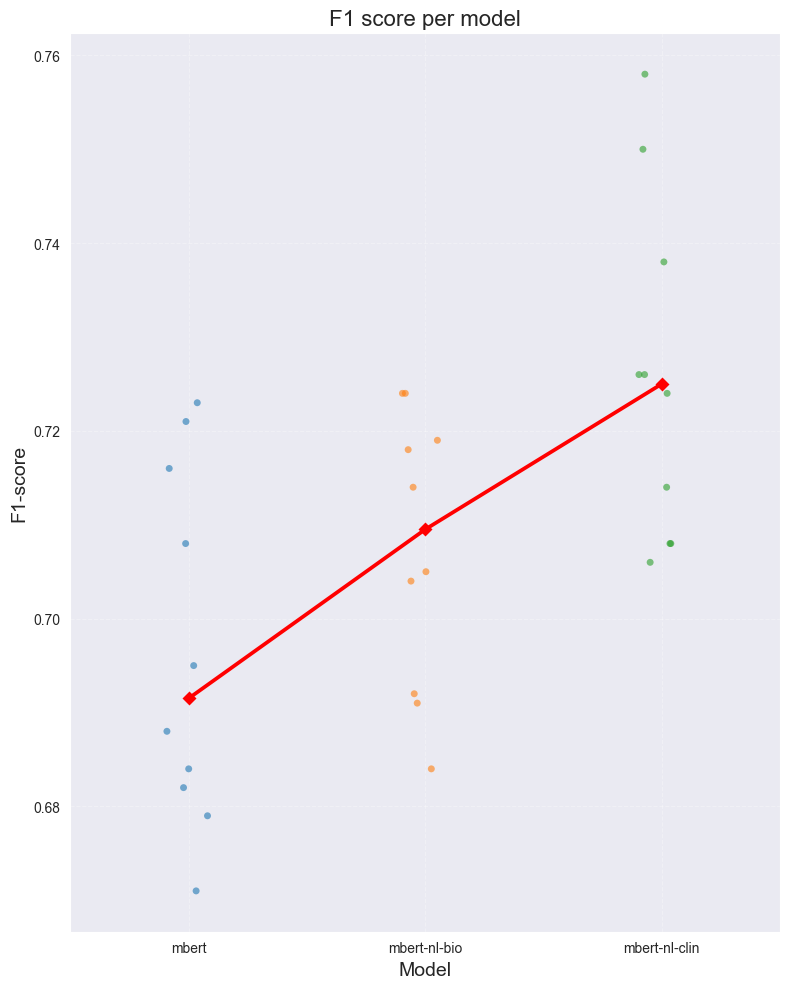

In [18]:
plt.figure(figsize = (8,10))

median_df = result_df.groupby('model', as_index = False)['macro_f1'].median()
median_df = median_df.sort_values("macro_f1", ascending = True)

model_order = median_df["model"].tolist()
result_df["model"] = pd.Categorical(result_df["model"], categories = model_order, ordered = True)
median_df["model"] = pd.Categorical(median_df["model"], categories = model_order, ordered = True)

sns.stripplot(data = result_df, 
              x = 'model', 
              y = 'macro_f1', 
              hue = 'model',
              jitter = True, 
              alpha = 0.6)

sns.pointplot(data = median_df, x = 'model', y = 'macro_f1', color = 'red', markers = 'D', scale = 1.0, join = True, linestyles = '-', errorbar = None)

plt.title("F1 score per model", fontsize = 16)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("F1-score", fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.3)

plt.savefig("F1_per_model.png", dpi=300)
plt.tight_layout()
plt.show()

/var/folders/z2/_1pt2jfd5216hfcmv5xkx2gw0000gn/T/ipykernel_48397/2542630719.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_df = result_df.groupby('model', as_index = False)['mcc'].median()
/var/folders/z2/_1pt2jfd5216hfcmv5xkx2gw0000gn/T/ipykernel_48397/2542630719.py:17: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data = median_df, x = 'model', y = 'mcc', color = 'red', markers = 'D', scale = 1.0, join = True, linestyles = '-', errorbar = None)
/var/folders/z2/_1pt2jfd5216hfcmv5xkx2gw0000gn/T/ipykernel_48397/2542630719.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0

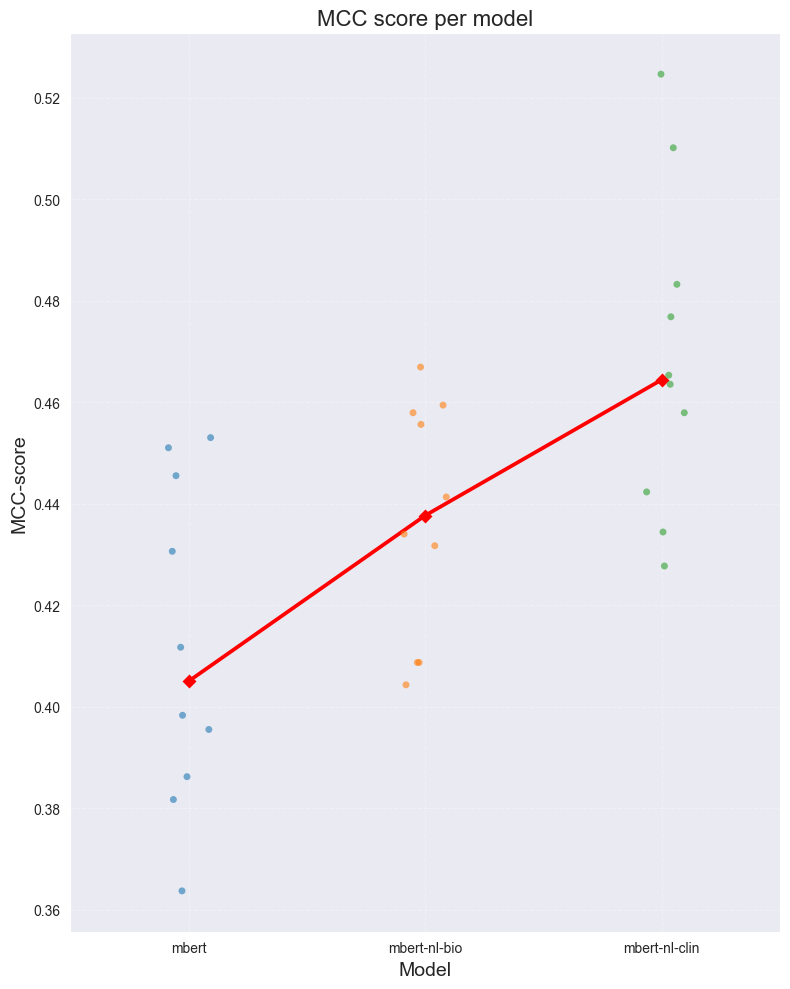

In [20]:
plt.figure(figsize = (8,10))

median_df = result_df.groupby('model', as_index = False)['mcc'].median()
median_df = median_df.sort_values("mcc", ascending = True)

model_order = median_df["model"].tolist()
result_df["model"] = pd.Categorical(result_df["model"], categories = model_order, ordered = True)
median_df["model"] = pd.Categorical(median_df["model"], categories = model_order, ordered = True)

sns.stripplot(data = result_df, 
              x = 'model', 
              y = 'mcc', 
              hue = 'model',
              jitter = True, 
              alpha = 0.6)

sns.pointplot(data = median_df, x = 'model', y = 'mcc', color = 'red', markers = 'D', scale = 1.0, join = True, linestyles = '-', errorbar = None)

plt.title("MCC score per model", fontsize = 16)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("MCC-score", fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.3)

plt.savefig("mcc_per_model.png", dpi=300)
plt.tight_layout()
plt.show()

In [28]:
from itertools import combinations
from scipy.stats import wilcoxon

model_names = result_df["model"].unique()

for m1, m2 in combinations(model_names, 2):
    f1_1 = result_df[result_df["model"] == m1].sort_values("fold")["mcc"].values
    f1_2 = result_df[result_df["model"] == m2].sort_values("fold")["mcc"].values
    stat, p = wilcoxon(f1_1, f1_2)
    print(f"{m1} vs {m2} → p-value = {p:.4f}")

mbert vs mbert-nl-clin → p-value = 0.0098
mbert vs mbert-nl-bio → p-value = 0.0273
mbert-nl-clin vs mbert-nl-bio → p-value = 0.0020
